In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataframes from disk
gamedata_df = pd.read_csv("espn_gamedata.csv")
# Import csv with special option to make it work properly
allplays_df = pd.read_csv("espn_parsedplays_2004-2016.csv", 
                          encoding = "ISO-8859-1",
                          low_memory = False
                         )

In [6]:
allplays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570330 entries, 0 to 570329
Data columns (total 23 columns):
Unnamed: 0         570330 non-null int64
downdist           570330 non-null object
detail             568720 non-null object
home               570330 non-null object
away               570330 non-null object
possession         570330 non-null object
home_score         570330 non-null int64
away_score         570330 non-null int64
gameId             570330 non-null int64
down               570330 non-null int64
dist               570330 non-null object
home_fieldpos      570330 non-null int64
qtr                570330 non-null object
time_rem           570330 non-null object
secs_rem           570330 non-null int64
home_lead          570330 non-null int64
total_score        570330 non-null int64
adj_lead           570330 non-null float64
OT                 570330 non-null int64
home_possession    570330 non-null int64
home_win           570330 non-null object
season           

In [7]:
gamedata_df.columns

Index(['gameId', 'result', 'season', 'week', 'home', 'away', 'winner',
       'home_score', 'away_score', 'OT'],
      dtype='object')

In [5]:
# Objective is to look at detail column and extract
# as much info as possible about the plays

In [12]:
# Start by looking at downs 1-4 from 2015 season
plays_2015 = allplays_df[allplays_df.season == 2015]
downs_1to4 = plays_2015[ plays_2015.down.isin([1,2,3,4]) ]

downs_1to4.sample(5)

,Unnamed: 0,downdist,detail,home,away,possession,home_score,away_score,gameId,down,...,time_rem,secs_rem,home_lead,total_score,adj_lead,OT,home_possession,home_win,season,week
509561,509561,['2nd and 4 at CHI 23'],(1:34 - 1st) J.Cutler pass short middle to A....,CHI,GB,CHI,0,7,400791510,2,...,1:34,2794,-7,7,-0.246412,0,1,1,2015,12
485744,485744,['3rd and 13 at BAL 17'],(13:38 - 3rd) (Shotgun) J.Flacco pass short r...,BAL,OAK,BAL,20,20,400791702,3,...,13:38,1718,0,40,0.000000,0,1,0,2015,2
490344,490344,['4th and 8 at CIN 41'],"(2:07 - 3rd) K.Huber punts 34 yards to KC 25,...",KC,CIN,CIN,15,21,400791712,4,...,2:07,1027,-6,36,-0.118262,0,0,0,2015,4
518546,518546,['2nd and 10 at WSH 21'],(3:40 - 2nd) T.Taylor scrambles left end to W...,BUF,WSH,BUF,0,21,400791695,2,...,3:40,2020,-21,21,-0.528145,0,1,0,2015,15
485972,485972,['1st and 10 at JAX 20'],(12:30 - 4th) B.Bortles pass incomplete deep ...,MIA,JAX,JAX,20,20,400791680,1,...,12:30,750,0,40,0.000000,0,0,0,2015,2


In [13]:
downs_1to4[['down','dist','home_possession','home_fieldpos','detail']].sample(25)

,down,dist,home_possession,home_fieldpos,detail
483545,2,10,0,16,(8:45 - 1st) (Shotgun) C.Kaepernick pass shor...
499412,1,10,1,-20,(1:10 - 3rd) J.Flacco pass short left to S.Sm...
492327,1,10,1,-30,(14:55 - OT) (Shotgun) K.Cousins pass short r...
486722,1,10,1,-27,(14:55 - 1st) D.Carr pass short left to A.Coo...
484062,2,19,0,18,(12:27 - 1st) (Shotgun) J.Cutler pass incompl...
513396,1,10,1,-7,(8:13 - 2nd) R.Fitzpatrick pass short left to...
502210,1,10,1,7,(1:02 - 3rd) (Shotgun) J.Ajayi up the middle ...
519552,3,6,0,-20,(5:41 - 1st) (Shotgun) P.Rivers pass short ri...
503086,2,7,1,11,"(9:06 - 3rd) (No Huddle, Shotgun) L.Murray le..."
486821,1,10,1,30,(10:47 - 3rd) T.Jones left tackle to CLV 13 f...


In [42]:
# Start to parse out pass/run plays
details = downs_1to4.detail.values

# Make a dictionary for whether play is a run or pass
# Index for these will be the play detail
is_pass = {d: 0 for d in details}
is_run = {d: 0 for d in details}

In [73]:
# Try and read specific words from the detail
for d in details:
    if " pass " in d:
        is_pass[d] = 1
    elif " Pass " in d:
        is_pass[d] = 1
    elif " sacked " in d:
        is_pass[d] = 1
    elif " scramble" in d:
        is_pass[d] = 1
    elif " interception" in d.lower():
        is_pass[d] = 1

In [44]:
# Look at examples of things that got listed as a pass
confirmed_passes = [d for d in details if is_pass[d] == 1]
confirmed_passes[:5]

['(14:21 - 1st)  B.Roethlisberger pass short right to A.Brown pushed ob at PIT 47 for 9 yards (D.Hightower).',
 '(13:26 - 1st)  B.Roethlisberger pass short right to H.Miller to NE 35 for 14 yards (J.Mayo).',
 '(12:05 - 1st)  A.Brown sacked at NE 32 for -8 yards (M.Brown).',
 '(10:28 - 1st)  (Shotgun) B.Roethlisberger pass short right to H.Miller to NE 26 for 10 yards (P.Chung; M.Butler).',
 '(9:40 - 1st)  (Shotgun) T.Brady pass short left to J.Edelman pushed ob at NE 47 for 13 yards (W.Gay). PENALTY on NE-N.Solder, Unnecessary Roughness, 15 yards, enforced between downs.']

In [74]:
# Now try and read specific words from detail to get runs
for d in details:
    if not " scramble" in d:
        if " run " in d.lower():
            is_run[d] = 1
        elif " rush" in d.lower():
            is_run[d] = 1
        elif " left tackle " in d:
            is_run[d] = 1
        elif " right tackle " in d:
            is_run[d] = 1
        elif " up the middle " in d:
            is_run[d] = 1
        elif " left end " in d:
            is_run[d] = 1
        elif " right end " in d:
            is_run[d] = 1
        elif " left guard " in d:
            is_run[d] = 1
        elif " right guard " in d:
            is_run[d] = 1

In [46]:
# Look at examples of things that are listed as runs
confirmed_runs = [d for d in details if is_run[d] == 1]
confirmed_runs[:5]

['(15:00 - 1st)  De.Williams right tackle to PIT 38 for 18 yards (D.Hightower).',
 '(14:04 - 1st)  De.Williams right guard to NE 49 for 4 yards (J.Collins; M.Brown).',
 '(12:42 - 1st)  (Shotgun) De.Williams right guard to NE 24 for 11 yards (J.Collins).',
 '(11:20 - 1st)  (Shotgun) De.Williams right end pushed ob at NE 28 for 4 yards (D.Hightower). PENALTY on PIT-M.Gilbert, Offensive Holding, 10 yards, enforced at NE 32 - No Play.',
 '(10:53 - 1st)  W.Johnson right guard to NE 36 for 6 yards (R.Ninkovich). NE-D.Easley was injured during the play. He is Out.']

In [75]:
# Do the same with punts and field goals
is_punt = {d: 0 for d in details}
is_fieldgoal = {d: 0 for d in details}

for d in details:
    if " punts " in d.lower():
        is_punt[d] = 1
    elif " punt return" in d.lower():
        is_punt[d] = 1
    elif " field goal " in d:
        is_fieldgoal[d] = 1
    elif " Field Goal" in d:
        is_fieldgoal[d] = 1
        
confirmed_punts = [d for d in details if is_punt[d] == 1]
confirmed_fieldgoals = [d for d in details if is_fieldgoal[d] == 1]
print(confirmed_punts[:5])
print(confirmed_fieldgoals[:5])

['(7:41 - 1st)  R.Allen punts 36 yards to PIT 7, Center-J.Cardona, fair catch by A.Brown.', '(3:14 - 1st)  J.Berry punts 50 yards to NE 19, Center-G.Warren. D.Amendola to NE 34 for 15 yards (V.Williams). PENALTY on NE-M.Slater, Illegal Block Above the Waist, 10 yards, enforced at NE 20.', '(4:15 - 3rd)  R.Allen punts 43 yards to PIT 24, Center-J.Cardona. A.Brown to PIT 27 for 3 yards (M.Slater; J.Freeny).', '(8:29 - 4th)  J.Berry punts 37 yards to NE 36, Center-G.Warren, fair catch by D.Amendola. Penalty on PIT, Illegal Formation, declined. PENALTY on NE-E.Martin, Offensive Holding, 10 yards, enforced at NE 36.', '(7:36 - 4th)  R.Allen punts 63 yards to PIT 13, Center-J.Cardona. A.Brown ran ob at PIT 24 for 11 yards. PENALTY on NE, Illegal Formation, 5 yards, enforced at NE 24 - No Play.']
['(9:40 - 1st)  J.Scobee 44 yard field goal is No Good, Wide Right, Center-G.Warren, Holder-J.Berry.', '(8:38 - 2nd)  J.Scobee 46 yard field goal is No Good, Wide Right, Center-G.Warren, Holder-J.Ber

In [76]:
# Look at plays that are unlisted just yet
for d in details:
    if sum([is_pass[d],is_run[d],is_punt[d],is_fieldgoal[d]]) != 1:
        print(d)

(0:03 - 2nd)  T.Brady kneels to NE 18 for -2 yards.
(6:43 - 3rd) Will Johnson 1 Yard Rush TWO-POINT CONVERSION ATTEMPT. B.Roethlisberger pass to M.Wheaton is complete. ATTEMPT SUCCEEDS.
(12:49 - 4th)  PENALTY on PIT-K.Beachum, False Start, 4 yards, enforced at NE 1 - No Play.
(12:34 - 1st)  (Shotgun) PENALTY on IND-L.Louis, False Start, 5 yards, enforced at IND 40 - No Play.
(6:57 - 2nd)  (Shotgun) PENALTY on BUF-J.Hughes, Defensive Offside, 5 yards, enforced at IND 25 - No Play.
(0:20 - 2nd)  A.Luck kneels to IND 19 for -1 yards.
(14:13 - 4th)  (Shotgun) T.Taylor FUMBLES (Aborted) at BUF 5, and recovers at BUF 6. T.Taylor to BUF 13 for 7 yards (K.Langford).
(10:01 - 4th)  (Punt formation) PENALTY on BUF-C.Schmidt, Delay of Game, 5 yards, enforced at BUF 33 - No Play.
(1:52 - 4th)  T.Taylor kneels to IND 45 for -2 yards.
(1:12 - 4th)  T.Taylor kneels to IND 46 for -1 yards.
(0:32 - 4th)  T.Taylor kneels to IND 47 for -1 yards.
(11:02 - 1st)  (No Huddle, Shotgun) PENALTY on CHI-V.Ducass

In [83]:
# Try and get yardage gained during the play
yds_gained = {d: "X" for d in details}
parseable = {d: False for d in details}

for d in details:
    if is_run[d] == 1:
        words = d.split()
        # look for yardage in format "for X yards"
        for i, w in enumerate(words):
            if w == "for" and len(words) > i+2:
                if words[i+2].lower().rstrip(".,") in ("yd","yds","yrds","yard","yards"):
                    yds_gained[d] = int(words[i+1])
                    parseable[d] = True
                elif "no" in words[i+1] and "gain" in words[i+2]:
                    yds_gained[d] = 0
                    parseable[d] = True
                    
            elif w.lower() in ("yd","yds","yrds","yard","yards") and len(words) >= i+2:
                if words[i+1].lower().rstrip(".,") in ("run","rush"):
                    yds_gained[d] = int(words[i-1])
                    parseable[d] = True
        
        
    elif is_pass[d] == 1:
        words = d.split()
        # look for yardage in format "for X yards"
        for i, w in enumerate(words):
            if w == "for" and len(words) > i+2:
                if words[i+2].lower().rstrip(".,") in ("yd","yds","yrds","yard","yards"):
                    yds_gained[d] = int(words[i+1])
                    parseable[d] = True
                elif "no" in words[i+1] and "gain" in words[i+2]:
                    yds_gained[d] = 0
                    parseable = True
                    
            elif w.lower() in ("yd","yds","yrds","yard","yards") and len(words) >= i+2:
                 if words[i+1].lower().rstrip(".,") in ("pass"):
                    yds_gained[d] = int(words[i-1])
                    parseable = True
                    
            elif "incomplete" in w.lower():
                yds_gained[d] = 0
                parseable = True
                
            elif "intercepted" in w.lower() or "interception" in w.lower():
                yds_gained[d] = 0
                
    elif is_punt[d] == 1:
        yds_gained[d] = 0
    elif is_fieldgoal[d] == 1:
        yds_gained[d] = 0
                    
                    
# Look at plays that don't follow this template
for d in details:
    if yds_gained[d] == "X":
        print(d)

(0:03 - 2nd)  T.Brady kneels to NE 18 for -2 yards.
(12:49 - 4th)  PENALTY on PIT-K.Beachum, False Start, 4 yards, enforced at NE 1 - No Play.
(12:34 - 1st)  (Shotgun) PENALTY on IND-L.Louis, False Start, 5 yards, enforced at IND 40 - No Play.
(6:57 - 2nd)  (Shotgun) PENALTY on BUF-J.Hughes, Defensive Offside, 5 yards, enforced at IND 25 - No Play.
(0:20 - 2nd)  A.Luck kneels to IND 19 for -1 yards.
(14:13 - 4th)  (Shotgun) T.Taylor FUMBLES (Aborted) at BUF 5, and recovers at BUF 6. T.Taylor to BUF 13 for 7 yards (K.Langford).
(10:01 - 4th)  (Punt formation) PENALTY on BUF-C.Schmidt, Delay of Game, 5 yards, enforced at BUF 33 - No Play.
(1:52 - 4th)  T.Taylor kneels to IND 45 for -2 yards.
(1:12 - 4th)  T.Taylor kneels to IND 46 for -1 yards.
(0:32 - 4th)  T.Taylor kneels to IND 47 for -1 yards.
(11:02 - 1st)  (No Huddle, Shotgun) PENALTY on CHI-V.Ducasse, False Start, 5 yards, enforced at GB 8 - No Play.
(13:44 - 2nd)  (No Huddle) PENALTY on GB-N.Perry, Neutral Zone Infraction, 5 yard

In [1]:
# Objective: Assuming no fumbled snap or pre-snap penalty or other shenanigans,
#  should be able to figure out which plays are "successful" and then look at success rates

# Practical things to deal with:
    # What raw data to handle?
    # Need to be able to take a raw-ish pbp table and extract success rate
    # So make one function that will try and label plays as run/pass, yardage gained, and success
def found_pass(detail):
    d = detail.lower()
    if " pass" in d:
        return True
    elif " sacked " in d:
        return True
    elif " scramble" in d:
        return True
    elif " interception" in d:
        return True
    elif " intercepted" in d:
        return True
    return False
    
def found_run(detail):
    d = detail.lower()
    if not " scramble" in d:
        if " run " in d:
            return True
        elif " rush" in d:
            return True
        elif " left tackle " in d:
            return True
        elif " right tackle " in d:
            return True
        elif " up the middle " in d:
            return True
        elif " left end " in d:
            return True
        elif " right end " in d:
            return True
        elif " left guard " in d:
            return True
        elif " right guard " in d:
            return True
        return False
        
def found_punt(detail):
    d = detail.lower()
    if " punts " in d:
        return True
    elif " punt return" in d:
        return True
    return False
    
def found_fieldgoal(detail):
    d = detail.lower()
    if " field goal " in d:
        return True
    return False

def yds_run( i, detail ):
    words = detail.lower().split()
    # look for yardage in format "for X yards"
    for j, w in enumerate(words):
        if w == "for" and len(words) > j+2:
            if words[j+2].rstrip(".,") in ("yd","yds","yrd","yrds","yard","yards"):
                return int(words[j+1])
            # or "for no gain"
            elif "no" in words[j+1] and "gain" in words[j+2]:
                return 0
        
        # or "X yard run/rush"
        elif w in ("yd","yds","yrd","yrds","yard","yards") and len(words) >= j+2:
            if words[j+1].rstrip(".,") in ("run","rush"):
                return int(words[j-1])
        
    return "x"
    
def yds_passed( i, detail ):
    words = detail.lower().split()
    # look for yardage in format "for X yards"
    for j, w in enumerate(words):
        if w == "for" and len(words) > j+2:
            if words[j+2].rstrip(".,") in ("yd","yds","yrd","yrds","yard","yards"):
                return int(words[j+1])
            # or "for no gain"
            elif "no" in words[j+1] and "gain" in words[j+2]:
                return 0
            
        # or "X yard pass"
        elif w in ("yd","yds","yrd","yrds","yard","yards") and len(words) >= j+2:
            if words[j+1].rstrip(".,") in ("pass"):
                return int(words[j-1])

    # Or maybe pass went incomplete
    if "incomplete" in detail.lower():
        return 0
    
    # Or maybe pass was intercepted. In this case, just say yds_gained is zero
    elif ("intercepted" in detail.lower()) or ("interception" in detail.lower()):
        return 0
    
    return "x"

    
def parse_details(df):
    print(df.columns)
    details = df.detail.values
    down = df.down.values
    
    # Make a bunch of dictionaries for storiing play-specific data
    # This method assumes that play details are entirely unique.
    # If that assumption fails, would need to work on building lists based on order of "details"
    is_parseable = [False for d in details]
    is_run = [False for d in details]
    is_pass = [False for d in details]
    is_punt = [False for d in details]
    is_fieldgoal = [False for d in details]
    yds_gained = ["x" for d in details]
    qual_play = [False for d in details]
    
    # Loop through details going through logic tree to find appropriate values
    for i, d in enumerate(details):
        
        # Look exclusively for play details on downs 1-4
        if down[i] in [1,2,3,4]:
            
            # Try and parse a pass
            if found_run(d):
                is_run[i] = True
                yds_gained[i] = yds_run(i,d)
            
            # Try and parse a run
            elif found_pass(d):
                is_pass[i] = True
                yds_gained[i] = yds_passed(i,d)
            
            # Try and parse a punt
            elif found_punt(d):
                is_punt[i] = True
            
            # Try and parse a field goal
            elif found_fieldgoal(d):
                is_fieldgoal[i] = True
                
    for i, yds in enumerate(yds_gained):
        if (is_run[i] or is_pass[i]) and (yds != "x"):
            is_parseable[i] = True
            qual_play[i] = True
        elif is_punt[i]:
            is_parseable[i] = True
        elif is_fieldgoal[i]:
            is_parseable[i] = True
                
                
    # Now write the columns to the end of the df
    df['is_parseable'] = is_parseable
    df['is_run'] = is_run
    df['is_pass'] = is_pass
    df['is_punt'] = is_punt
    df['is_fieldgoal'] = is_fieldgoal
    df['yds_gained'] = yds_gained
    df['qual_play'] = qual_play
    
    return df

In [3]:
import copy
base_df = copy.deepcopy(plays_2015)
parsed_df = parse_details(base_df)
print(parsed_df)

NameError: name 'plays_2015' is not defined

In [130]:
relevant_cols = ['down','dist','detail','is_parseable',
                 'is_run','is_pass','yds_gained','qual_play']
parsed_df[relevant_cols][parsed_df.qual_play == True].sample(10)

,down,dist,detail,is_parseable,is_run,is_pass,yds_gained,qual_play
487468,2,10,(1:17 - 2nd) Keenan Allen Pass From Philip Riv...,True,False,True,34,True
487339,1,10,(0:24 - 3rd) L.Bell left tackle to PIT 38 for...,True,True,False,0,True
500764,1,15,(11:08 - 2nd) (Shotgun) A.Dalton scrambles ri...,True,False,True,1,True
503824,3,12,(10:29 - 3rd) (Shotgun) A.Luck scrambles righ...,True,False,True,11,True
494632,3,5,"(2:02 - 4th) (No Huddle, Shotgun) M.Ryan pass...",True,False,True,0,True
486476,3,6,(7:17 - 3rd) (Shotgun) A.Luck pass short midd...,True,False,True,7,True
483362,1,10,(5:42 - 1st) (Shotgun) S.Bradford pass short ...,True,False,True,13,True
489326,2,3,(11:55 - 1st) (Shotgun) De.Williams right gua...,True,True,False,8,True
524331,3,13,"(2:36 - 3rd) (No Huddle, Shotgun) R.Tannehill...",True,False,True,12,True
484041,2,4,(3:34 - 4th) (Shotgun) T.Brady pass short rig...,True,False,True,6,True


In [132]:
# Figure out whether a play was successful
# Definition:
    # 1st down: 50% of yardage to gain
    # 2nd down: 70% of yardage to gain
    # 3rd down: All of yardage to gain
quality_plays = copy.deepcopy(parsed_df[parsed_df.qual_play == True])
quality_plays.columns

Index(['Unnamed: 0', 'downdist', 'detail', 'home', 'away', 'possession',
       'home_score', 'away_score', 'gameId', 'down', 'dist', 'home_fieldpos',
       'qtr', 'time_rem', 'secs_rem', 'home_lead', 'total_score', 'adj_lead',
       'OT', 'home_possession', 'home_win', 'season', 'week', 'is_parseable',
       'is_run', 'is_pass', 'is_punt', 'is_fieldgoal', 'yds_gained',
       'qual_play'],
      dtype='object')

In [135]:
# First get yardage to gain for goal to go situations
dist = quality_plays.dist.values
fixed_dist = [d for d in dist]
home_possession = quality_plays.home_possession.values
for i, loc in enumerate(quality_plays.home_fieldpos.values):
    if dist[i] == "Goal":
        if home_possession[i] == 1:
            fixed_dist[i] = 50 - loc
        else:
            fixed_dist[i] = loc + 50
        
quality_plays['yds_to_go'] = fixed_dist

cols = ['dist','home_fieldpos','home_possession','yds_to_go']
quality_plays[cols][quality_plays.dist == "Goal"].sample(5)

,dist,home_fieldpos,home_possession,yds_to_go
500857,Goal,45,1,5
505314,Goal,45,1,5
481860,Goal,47,1,3
484600,Goal,-47,0,3
506260,Goal,-49,0,1


In [139]:
down = quality_plays.down.values
dist = quality_plays.yds_to_go.values
gain = quality_plays.yds_gained.values

is_successful = [0 for d in down]

for i, d in enumerate(down):
    if d == 1:
        if float(gain[i]) >= float(dist[i])*0.5:
            is_successful[i] = 1
    elif d == 2:
        if float(gain[i]) >= 0.7*float(dist[i]):
            is_successful[i] = 1
    elif d == 3 or d == 4:
        if gain[i] >= int(dist[i]):
            is_successful[i] = 1

quality_plays['is_success'] = is_successful

# Make summary to view
cols = ['down','yds_to_go','yds_gained','is_success']
quality_plays[cols].sample(10)

,down,yds_to_go,yds_gained,is_success
518197,3,10,1,0
512264,1,24,-8,0
501028,2,4,3,1
510510,1,10,15,1
512144,2,11,0,0
511527,1,10,41,1
499085,1,10,1,0
491598,2,9,5,0
517346,1,10,0,0
487740,1,10,1,0


In [233]:
# Try and look at success rate for a particular team
panthersplays = quality_plays[ quality_plays.possession == "CAR" ]
for d in (1,2,3,4):
    subplays = panthersplays[ panthersplays.down == d ]
    successes = subplays.is_success.sum()
    totalplays = subplays.is_success.count()
    rate = "{0:.3}".format(successes/totalplays)
    print("Down "+str(d)+" success rate: "+rate+" on "+str(totalplays)+" attempts")

Down 1 success rate: 0.437 on 490 attempts
Down 2 success rate: 0.478 on 358 attempts
Down 3 success rate: 0.427 on 211 attempts
Down 4 success rate: 0.7 on 10 attempts


In [164]:
# Group by team and down to get each team's success rate on 1-4 down
grouped = quality_plays.groupby(['possession','down'], as_index=False)
gdf = grouped.is_success.agg(['mean','count'])

In [167]:
# Now we can try and plot offensive success rate for each team
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

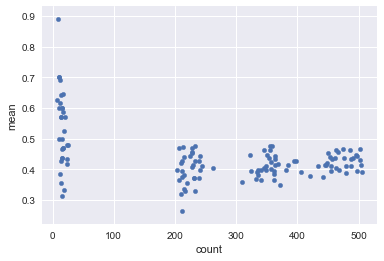

In [168]:
gdf.plot.scatter('count','mean')

In [187]:
def plot_success(df):
    grouped = df.groupby(['possession','down'],as_index=False)
    gdf = grouped.is_success.agg(['mean','count'])
#    gdf.plot.scatter('count','mean',title="Down "+str(i))
    
    fig, ax = plt.subplots()
    x = gdf['count'].values
    y = gdf['mean'].values
    ax.scatter( x, y )
    ax.set_xlabel("Attempts")
    ax.set_ylabel("Success Rate")
    ax.set_title("Down "+str(i))
    plt.show()
    

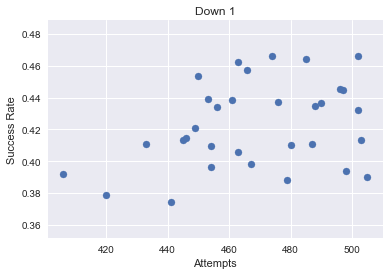

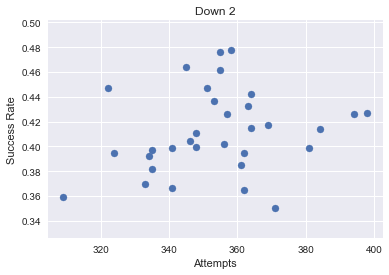

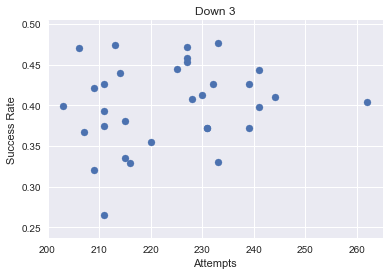

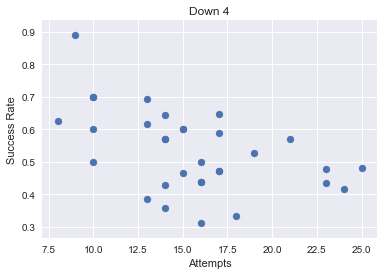

In [188]:
for i in (1,2,3,4):
    plot_success( quality_plays[quality_plays.down==i] )

In [ ]:
# So what analysis do I want to do?
# Offensive success rate
    # Overall, compared with league, 2015, 2016, 2017 to date
    # On 3rd/4th and short, compared with league
# Find a way to add team logos to plots
# Defensive success rate in the same categories
    
# What do I need to do in order to get there
    # Dataframes for 2016 and 2017
        # Scrape data for 2017 so far
        # Run 2016 through system

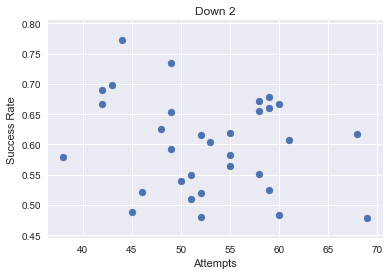

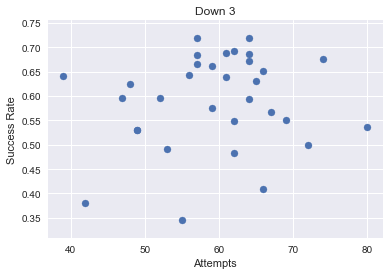

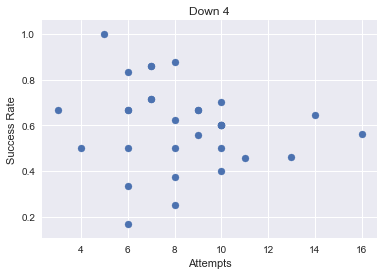

In [194]:
# Try looking at 3rd/4th and short
#quality_plays['yds_to_go'] = pd.to_numeric(quality_plays['yds_to_go'])
#quality_plays['down'] = pd.to_numeric(quality_plays['down'])
short_yardage = quality_plays[ (quality_plays.yds_to_go <= 3) ]
#grouped = short_yardage.groupby(['offense','down'])
#gdf = grouped.agg(['mean','count'])
for i in (2,3,4):
    plot_success( short_yardage[short_yardage.down==i] )

In [245]:
grouped = short_yardage.groupby(['possession','down'])
gdf = grouped.is_success.agg(['mean','count'])
#print(gdf.loc['ATL','mean'])
#gdf.groupby(level='down').mean()
print(gdf.unstack(0).transpose())
gdf.unstack(0).transpose().to_csv("datasets/shortyardage_successrate_2015.csv")

down                      1          2          3          4
      possession                                            
mean  ARI          0.375000   0.509804   0.651515   0.500000
      ATL          0.300000   0.551724   0.693548   0.500000
      BAL          0.444444   0.661017   0.537500   0.562500
      BUF          1.000000   0.483333   0.548387   0.333333
      CAR          0.642857   0.677966   0.661017   0.714286
      CHI          0.833333   0.653061   0.675676   0.666667
      CIN          0.500000   0.734694   0.550725   0.600000
      CLE          0.166667   0.480769   0.666667   0.500000
      DAL          0.666667   0.625000   0.490566   1.000000
      DEN          0.625000   0.655172   0.530612   0.714286
      DET          0.750000   0.478261   0.630769   0.600000
      GB           0.500000   0.615385   0.409091   0.461538
      HOU          0.333333   0.521739   0.687500   0.454545
      IND          0.142857   0.519231   0.567164   0.666667
      JAX          0.307

In [237]:
grouped = quality_plays.groupby(['possession','down'])
gdf = grouped.is_success.agg(['mean','count'])
gdf

mean  count
possession down                 
ARI        1     0.444668    497
           2     0.461972    355
           3     0.470874    206
           4     0.625000      8
ATL        1     0.466135    502
           2     0.395028    362
           3     0.476395    233
           4     0.571429     21
BAL        1     0.410678    487
           2     0.442308    364
           3     0.372385    239
           4     0.480000     25
BUF        1     0.439294    453
           2     0.399425    348
           3     0.413043    230
           4     0.466667     15
CAR        1     0.436735    490
           2     0.477654    358
           3     0.426540    211
           4     0.700000     10
CHI        1     0.409692    454
           2     0.425770    357
           3     0.458150    227
           4     0.600000     10
CIN        1     0.438178    461
           2     0.463768    345
           3     0.421053    209
           4     0.692308     13
CLE        1     0.396476    454
           2     0.364641    362
...                   ...    ...
PIT        3     0.399015    203
           4     0.357143     14
SD         1     0.393574    498
           2     0.427136    398
           3     0.443983    241
           4     0.312500     16
SEA        1     0.462203    463
           2     0.476056    355
           3     0.474178    213
           4     0.888889      9
SF         1     0.378571    420
           2     0.369369    333
           3     0.334884    215
           4     0.526316     19
STL        1     0.391626    406
           2     0.359223    309
           3     0.265403    211
           4     0.384615     13
TB         1     0.445565    496
           2     0.404624    346
           3     0.439252    214
           4     0.600000     15
TEN        1     0.434211    456
           2     0.395062    324
           3     0.328704    216
           4     0.437500     16
WSH        1     0.420935    449
           2     0.410920    348
           3     0.453744    227
           4     0.642857     14

[128 rows x 2 columns]

In [242]:
# Reshape to make 0th index as columns
print(gdf.unstack(0).transpose())
gdf.unstack(0).transpose().to_csv("datasets/overall_successrate_2015.csv")

down                       1           2           3          4
      possession                                               
mean  ARI           0.444668    0.461972    0.470874   0.625000
      ATL           0.466135    0.395028    0.476395   0.571429
      BAL           0.410678    0.442308    0.372385   0.480000
      BUF           0.439294    0.399425    0.413043   0.466667
      CAR           0.436735    0.477654    0.426540   0.700000
      CHI           0.409692    0.425770    0.458150   0.600000
      CIN           0.438178    0.463768    0.421053   0.692308
      CLE           0.396476    0.364641    0.426778   0.416667
      DAL           0.453333    0.392216    0.367150   0.470588
      DEN           0.410417    0.385042    0.372294   0.571429
      DET           0.463918    0.436261    0.381395   0.571429
      GB            0.398287    0.426396    0.330472   0.478261
      HOU           0.390099    0.350404    0.404580   0.333333
      IND           0.406048    0.401685

# Now try and repeat this kind of analysis for 2016

In [246]:
# Start by looking at downs 1-4 from 2015 season
plays_2016 = allplays_df[allplays_df.season == 2016]
base_df = copy.deepcopy(plays_2016)
parsed_df = parse_details(base_df)

Index(['Unnamed: 0', 'downdist', 'detail', 'home', 'away', 'possession',
       'home_score', 'away_score', 'gameId', 'down', 'dist', 'home_fieldpos',
       'qtr', 'time_rem', 'secs_rem', 'home_lead', 'total_score', 'adj_lead',
       'OT', 'home_possession', 'home_win', 'season', 'week', 'is_parseable',
       'is_run', 'is_pass', 'is_punt', 'is_fieldgoal', 'yds_gained'],
      dtype='object')


In [247]:
parsed_df.sample(5)

,Unnamed: 0,downdist,detail,home,away,possession,home_score,away_score,gameId,down,...,home_win,season,week,is_parseable,is_run,is_pass,is_punt,is_fieldgoal,yds_gained,qual_play
563227,563227,['1st and 10 at NYG 47'],(3:06 - 1st) (Shotgun) D.Washington right end...,DET,NYG,DET,0,7,400874687,1,...,0,2016,15,True,True,False,False,False,1,True
558654,558654,['4th and 9 at ARI 35'],(6:01 - 4th) Dustin Hopkins 53 Yd Field Goal,WSH,ARI,WSH,20,24,400874726,4,...,0,2016,13,False,False,False,False,False,x,False
565068,565068,['3rd and 4 at MIA 31'],(15:00 - 4th) (Shotgun) M.Moore pass short le...,MIA,BUF,MIA,28,21,400874489,3,...,1,2016,16,True,False,True,False,False,10,True
547530,547530,['1st and 10 at NYJ 36'],(10:12 - 4th) (Shotgun) R.Fitzpatrick pass de...,NYJ,MIA,NYJ,16,20,400874601,1,...,0,2016,9,True,False,True,False,False,25,True
566257,566257,['2nd and 3 at IND 32'],(14:20 - 2nd) F.Gore right guard to IND 35 fo...,IND,OAK,IND,0,7,400874546,2,...,0,2016,16,True,True,False,False,False,3,True


In [248]:
# Filter out just the quality plays
quality_plays = copy.deepcopy(parsed_df[parsed_df.qual_play == True])

# First get yardage to gain for goal to go situations
dist = quality_plays.dist.values
fixed_dist = [d for d in dist]
home_possession = quality_plays.home_possession.values
for i, loc in enumerate(quality_plays.home_fieldpos.values):
    if dist[i] == "Goal":
        if home_possession[i] == 1:
            fixed_dist[i] = 50 - loc
        else:
            fixed_dist[i] = loc + 50
        
quality_plays['yds_to_go'] = fixed_dist

cols = ['dist','home_fieldpos','home_possession','yds_to_go']
quality_plays[cols][quality_plays.dist == "Goal"].sample(5)

,dist,home_fieldpos,home_possession,yds_to_go
570001,Goal,46,1,4
554136,Goal,25,1,25
531675,Goal,46,1,4
566404,Goal,-49,0,1
542566,Goal,43,1,7


In [249]:
# Make column for successful plays
down = quality_plays.down.values
dist = quality_plays.yds_to_go.values
gain = quality_plays.yds_gained.values

is_successful = [0 for d in down]

for i, d in enumerate(down):
    if d == 1:
        if float(gain[i]) >= float(dist[i])*0.5:
            is_successful[i] = 1
    elif d == 2:
        if float(gain[i]) >= 0.7*float(dist[i]):
            is_successful[i] = 1
    elif d == 3 or d == 4:
        if gain[i] >= int(dist[i]):
            is_successful[i] = 1

quality_plays['is_success'] = is_successful

# Make summary to view
cols = ['down','yds_to_go','yds_gained','is_success']
quality_plays[cols].sample(10)

,down,yds_to_go,yds_gained,is_success
537034,1,10,2,0
532075,1,10,2,0
539831,1,10,7,1
565258,3,6,8,1
540784,2,10,7,1
536168,1,10,7,1
540484,1,10,5,1
535269,3,9,9,1
542201,1,10,0,0
555518,3,9,11,1


In [250]:
grouped = quality_plays.groupby(['possession','down'])
gdf = grouped.is_success.agg(['mean','count'])
# Reshape to make 0th index as columns
print(gdf.unstack(0).transpose())
gdf.unstack(0).transpose().to_csv("datasets/overall_successrate_2016.csv")

down                       1           2           3          4
      possession                                               
mean  ARI           0.449219    0.418848    0.424779   0.500000
      ATL           0.493976    0.467492    0.417989   0.533333
      BAL           0.422594    0.388587    0.369919   0.444444
      BUF           0.439825    0.445070    0.413636   0.466667
      CAR           0.418219    0.369748    0.378723   0.578947
      CHI           0.486316    0.445820    0.400000   0.307692
      CIN           0.399151    0.491935    0.409091   0.777778
      CLE           0.393665    0.369231    0.358744   0.684211
      DAL           0.465021    0.512968    0.458763   1.000000
      DEN           0.416667    0.408571    0.353191   0.562500
      DET           0.431767    0.415954    0.415094   0.700000
      GB            0.437367    0.436782    0.481982   0.444444
      HOU           0.449679    0.356742    0.368201   0.333333
      IND           0.435685    0.470423

In [253]:
quality_plays['yds_to_go'] = pd.to_numeric(quality_plays['yds_to_go'])
grouped = quality_plays[ (quality_plays.yds_to_go <= 3) ].groupby(['possession','down'])
gdf = grouped.is_success.agg(['mean','count'])
# Reshape to make 0th index as columns
print(gdf.unstack(0).transpose())
gdf.unstack(0).transpose().to_csv("datasets/shortyardage_successrate_2016.csv")

down                      1          2          3          4
      possession                                            
mean  ARI          0.375000   0.597222   0.745455   0.666667
      ATL          0.300000   0.666667   0.596154   0.666667
      BAL          0.428571   0.461538   0.571429   0.666667
      BUF          0.500000   0.543860   0.558824   0.666667
      CAR          0.466667   0.508772   0.542373   0.750000
      CHI          0.714286   0.739130   0.590909   0.428571
      CIN          0.555556   0.636364   0.609375   0.875000
      CLE          0.625000   0.459459   0.636364   0.777778
      DAL          0.909091   0.698413   0.666667   1.000000
      DEN          0.375000   0.562500   0.436620   0.727273
      DET          0.583333   0.600000   0.568627   0.875000
      GB           0.400000   0.610169   0.636364   0.416667
      HOU          0.636364   0.745763   0.531915   0.583333
      IND          0.363636   0.586207   0.552632   0.375000
      JAX          0.700

# Now go for defense!

In [17]:
# Start by looking at downs 1-4 from 2015 season
plays_2015 = allplays_df[allplays_df.season == 2015]
base_df = copy.deepcopy(plays_2015)
parsed_df = parse_details(base_df)

Index(['Unnamed: 0', 'downdist', 'detail', 'home', 'away', 'possession',
       'home_score', 'away_score', 'gameId', 'down', 'dist', 'home_fieldpos',
       'qtr', 'time_rem', 'secs_rem', 'home_lead', 'total_score', 'adj_lead',
       'OT', 'home_possession', 'home_win', 'season', 'week'],
      dtype='object')


In [18]:
# Filter out just the quality plays
quality_plays = copy.deepcopy(parsed_df[parsed_df.qual_play == True])

# First get yardage to gain for goal to go situations
dist = quality_plays.dist.values
fixed_dist = [d for d in dist]
home_possession = quality_plays.home_possession.values
for i, loc in enumerate(quality_plays.home_fieldpos.values):
    if dist[i] == "Goal":
        if home_possession[i] == 1:
            fixed_dist[i] = 50 - loc
        else:
            fixed_dist[i] = loc + 50
        
quality_plays['yds_to_go'] = fixed_dist

In [19]:
# Make column for successful plays
down = quality_plays.down.values
dist = quality_plays.yds_to_go.values
gain = quality_plays.yds_gained.values

is_successful = [0 for d in down]

for i, d in enumerate(down):
    if d == 1:
        if float(gain[i]) >= float(dist[i])*0.5:
            is_successful[i] = 1
    elif d == 2:
        if float(gain[i]) >= 0.7*float(dist[i]):
            is_successful[i] = 1
    elif d == 3 or d == 4:
        if gain[i] >= int(dist[i]):
            is_successful[i] = 1

quality_plays['is_success'] = is_successful

# Make summary to view
cols = ['down','yds_to_go','yds_gained','is_success']
quality_plays[cols].sample(10)

,down,yds_to_go,yds_gained,is_success
491639,3,5,0,0
504975,2,9,7,1
494261,1,10,26,1
517737,1,10,-1,0
504620,1,10,0,0
489836,3,9,12,1
515617,2,10,-2,0
492028,1,10,5,1
492559,1,10,4,0
486297,1,10,7,1


In [20]:
# Make a column for defensive team
home = quality_plays.home.values
away = quality_plays.away.values
offense = quality_plays.possession.values
defense = [t for t in home]

for i, o in enumerate(offense):
    if o == home[i]:
        defense[i] = away[i]
    elif o == away[i]:
        defense[i] = home[i]
        
quality_plays['defense'] = defense

cols = ['home','away','possession','defense']
quality_plays[cols].sample(5)

,home,away,possession,defense
522965,CIN,DEN,CIN,DEN
491806,DAL,NO,DAL,NO
490675,CAR,TB,TB,CAR
521849,CHI,TB,CHI,TB
499218,PHI,CAR,PHI,CAR


In [21]:
grouped = quality_plays.groupby(['defense','down'])
gdf = grouped.is_success.agg(['mean','count'])
# Reshape to make 0th index as columns
print(gdf.unstack(0).transpose())
gdf.unstack(0).transpose().to_csv("datasets/defensive_successrate_2015.csv")

down                    1           2           3          4
      defense                                               
mean  ARI        0.407323    0.375367    0.393519   0.529412
      ATL        0.450644    0.461765    0.422886   0.400000
      BAL        0.390625    0.388571    0.396396   0.500000
      BUF        0.452174    0.388406    0.418182   0.428571
      CAR        0.342795    0.363889    0.395745   0.592593
      CHI        0.437220    0.441595    0.453271   0.416667
      CIN        0.415948    0.433428    0.424242   0.428571
      CLE        0.416122    0.439883    0.410138   0.611111
      DAL        0.448802    0.426513    0.421296   0.500000
      DEN        0.360802    0.312329    0.371901   0.357143
      DET        0.394678    0.452722    0.414286   0.625000
      GB         0.416481    0.362832    0.375000   0.476190
      HOU        0.433036    0.376855    0.296460   0.615385
      IND        0.398773    0.380822    0.400844   0.733333
      JAX        0.41082

# Now work on 2017

In [22]:
# Load dataframes from disk
gamedata_df = pd.read_csv("espn_2017gamedata.csv")
# Import csv with special option to make it work properly
allplays_df = pd.read_csv("espn_parsedplays_2017_wk1-5.csv", 
                          encoding = "ISO-8859-1",
                          low_memory = False
                         )

In [23]:
base_df = copy.deepcopy(allplays_df)
parsed_df = parse_details(base_df)
print(parsed_df)

Index(['Unnamed: 0', 'downdist', 'detail', 'home', 'away', 'possession',
       'home_score', 'away_score', 'gameId', 'down', 'dist', 'home_fieldpos',
       'qtr', 'time_rem', 'secs_rem', 'home_lead', 'total_score', 'adj_lead',
       'OT', 'home_possession', 'home_win', 'season', 'week'],
      dtype='object')
       Unnamed: 0                  downdist  \
0               0                        []   
1               1   ['1st and 10 at NE 27']   
2               2   ['2nd and 10 at NE 27']   
3               3    ['3rd and 2 at NE 35']   
4               4   ['1st and 10 at NE 43']   
5               5    ['2nd and 7 at NE 46']   
6               6   ['1st and 10 at KC 35']   
7               7    ['2nd and 5 at KC 30']   
8               8   ['1st and 10 at KC 14']   
9               9  ['1st and Goal at KC 2']   
10             10  ['1st and Goal at KC 2']   
11             11  ['2nd and Goal at KC 2']   
12             12                        []   
13             13   ['1st an

In [28]:
def process_pbp(df):
    # Function to parse details in pbp tables, 
    # adding columns for play selection, yds_gained, and success binary
    
    # Process detail column of df
    parsed_df = parse_details(df)
    
    # Filter to just "quality plays" that are totally parseable
    qp = copy.deepcopy(parsed_df[parsed_df.qual_play == True])
    
    # Get yardage to gain for goal to go situations
    dist = qp.dist.values
    fixed_dist = [d for d in dist]
    home_poss = qp.home_possession.values
    for i, loc in enumerate(qp.home_fieldpos.values):
        if dist[i] == "Goal":
            if home_poss[i] == 1:
                fixed_dist[i] = 50 - loc
            else:
                fixed_dist[i] = loc + 50
                
    qp['yds_to_go'] = fixed_dist
    
    # Make column for successful plays
    down = qp.down.values
    dist = qp.yds_to_go.values
    gain = qp.yds_gained.values
    is_successful = [0 for d in down]
    for i, d in enumerate(down):
        if d == 1:
            if float(gain[i]) >= 0.5*float(dist[i]):
                is_successful[i] = 1
        elif d == 2:
            if float(gain[i] >= 0.7*float(dist[i])):
                is_successful[i] = 1
        elif d in (3,4):
            if gain[i] >= int(dist[i]):
                is_successful[i] = 1
                
    qp['is_success'] = is_successful
    
    # Finally, make column for specifying team on defense
    home = qp.home.values
    away = qp.away.values
    offense = qp.possession.values
    defense = [t for t in home]
    for i, o in enumerate(offense):
        if o == home[i]:
            defense[i] = away[i]
        elif o == away[i]:
            defense[i] = home[i]
            
    qp['defense'] = defense
    
    
    # and eventually return the dataFrame, which is now separate in memory from original
    return qp

In [29]:
plays_2017 = process_pbp(allplays_df)

cols = ['possession','defense','home','away','down','yds_to_go','yds_gained','is_success']
plays_2017[cols].sample(10)

Index(['Unnamed: 0', 'downdist', 'detail', 'home', 'away', 'possession',
       'home_score', 'away_score', 'gameId', 'down', 'dist', 'home_fieldpos',
       'qtr', 'time_rem', 'secs_rem', 'home_lead', 'total_score', 'adj_lead',
       'OT', 'home_possession', 'home_win', 'season', 'week', 'is_parseable',
       'is_run', 'is_pass', 'is_punt', 'is_fieldgoal', 'yds_gained',
       'qual_play'],
      dtype='object')


,possession,defense,home,away,down,yds_to_go,yds_gained,is_success
3285,PIT,MIN,MIN,PIT,1,15,-7,0
1669,LAR,IND,IND,LAR,2,9,0,0
9560,BAL,PIT,PIT,BAL,3,6,14,1
9812,SF,ARI,SF,ARI,1,10,0,0
5279,SF,LAR,LAR,SF,2,7,-3,0
7772,OAK,WSH,OAK,WSH,2,10,5,0
9558,BAL,PIT,PIT,BAL,1,10,-6,0
1010,DET,ARI,ARI,DET,1,10,1,0
4933,SF,SEA,SF,SEA,1,10,0,0
4868,SF,SEA,SF,SEA,1,10,0,0


In [34]:
grouped = plays_2017.groupby(['defense','down'])
gdf = grouped.is_success.agg(['mean','count'])
# Reshape to make 0th index as columns
print(gdf.unstack(0).transpose())

down                    1           2          3          4
      defense                                              
mean  ARI        0.381944    0.315315   0.417722   1.000000
      ATL        0.448276    0.380435   0.370370   0.800000
      BAL        0.351351    0.414414   0.378788   0.500000
      BUF        0.412587    0.321101   0.426667   0.400000
      CAR        0.500000    0.423913   0.390625   0.333333
      CHI        0.404412    0.390476   0.458333   1.000000
      CIN        0.350000    0.280374   0.361446   0.500000
      CLE        0.408759    0.336634   0.432836   0.000000
      DAL        0.389262    0.474576   0.455882   0.500000
      DEN        0.405941    0.341772   0.267857   0.300000
      DET        0.424658    0.444444   0.402985   0.500000
      GB         0.445255    0.466019   0.412698   0.800000
      HOU        0.468085    0.322917   0.369231   0.666667
      IND        0.436242    0.403670   0.459459   0.600000
      JAX        0.380000    0.369748   

# Miscellaneous analysis

In [38]:
grouped = plays_2017[ plays_2017['is_run'] ].groupby(['possession','down'])
gdf = grouped.is_success.agg(['mean','count'])
print(gdf.unstack(0).transpose())

down                      1          2          3         4
      possession                                           
mean  ARI          0.250000   0.333333   0.750000  0.500000
      ATL          0.406780   0.432432   0.777778       NaN
      BAL          0.297619   0.450980   0.500000       NaN
      BUF          0.315068   0.314815   0.461538  0.000000
      CAR          0.304348   0.320000   0.785714       NaN
      CHI          0.328947   0.456522   0.500000  1.000000
      CIN          0.280000   0.351351   0.500000  1.000000
      CLE          0.349206   0.370370   0.714286  0.666667
      DAL          0.343284   0.428571   0.500000  0.800000
      DEN          0.275862   0.456522   0.500000  0.000000
      DET          0.227848   0.375000   0.500000  0.000000
      GB           0.392857   0.433333   0.833333  1.000000
      HOU          0.439024   0.489796   0.312500       NaN
      IND          0.291139   0.194444   0.764706       NaN
      JAX          0.367347   0.366667  